<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Ciência de Dados

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza


# K-Means

## 1. Leitura dos dados: (Municípios)


In [ ]:
!gdown --id 1qQ-KOL0hlLbAjOzmV4bA6JjyMsEOqw1z

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qQ-KOL0hlLbAjOzmV4bA6JjyMsEOqw1z
To: /content/municipios.csv
100% 389k/389k [00:00<00:00, 120MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv("municipios.csv")

df

,cd_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo
...,...,...,...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29,3971,74,America/Sao_Paulo
5566,2517407,Zabelê,-8.07901,-37.1057,0,25,542,83,America/Sao_Paulo
5567,3557154,Zacarias,-21.05060,-50.0552,0,35,2973,18,America/Sao_Paulo
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21,1287,98,America/Sao_Paulo


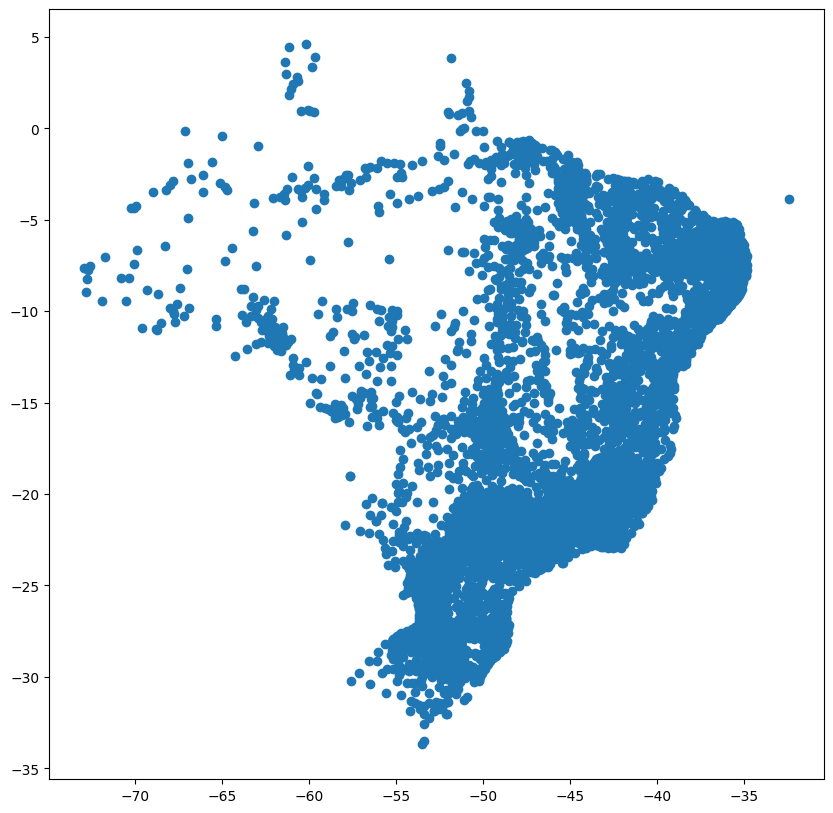

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.scatter(df["longitude"], df["latitude"])

plt.show()

## 2. K-Means

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


class sklearn.cluster.KMeans(n_clusters=8, \*, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

nc = 5

X = df[["longitude", "latitude"]].to_numpy()

kmeans = KMeans(n_clusters=nc, random_state=0).fit(X)

df["labels"] = kmeans.labels_

centroid = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df

,cd_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario,labels
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo,3
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo,3
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo,3
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo,3
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo,4
...,...,...,...,...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29,3971,74,America/Sao_Paulo,0
5566,2517407,Zabelê,-8.07901,-37.1057,0,25,542,83,America/Sao_Paulo,0
5567,3557154,Zacarias,-21.05060,-50.0552,0,35,2973,18,America/Sao_Paulo,3
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21,1287,98,America/Sao_Paulo,4


In [ ]:
X

array([[-49.4412 , -16.7573 ],
       [-47.3916 , -18.4831 ],
       [-48.7057 , -16.197  ],
       ...,
       [-50.0552 , -21.0506 ],
       [-45.6553 ,  -3.27014],
       [-51.552  , -27.4521 ]])

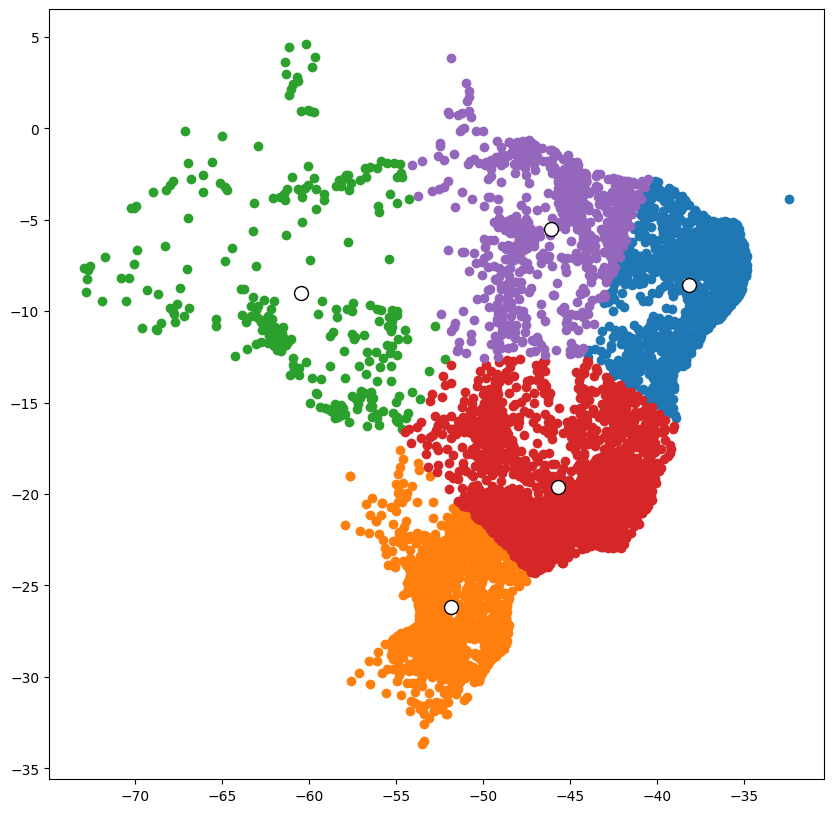

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(nc):

    c = df[df["labels"] == i]

    plt.scatter(c["longitude"], c["latitude"])

plt.scatter(centroid[:, 0], centroid[:, 1], c="white", s=100, edgecolors="black")

plt.show()

## 3. Métricas

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics


-   supervisionado: que utiliza uma verdade de base para cada amostra.
-   não-supervisionado: que não utiliza uma verdade de base e medem a ‘qualidade’ do próprio modelo.


| Métrica                                           | Descrição                                                               |
| ------------------------------------------------- | ----------------------------------------------------------------------- |
| metrics.adjusted_mutual_info_score(...[, ...])    | Adjusted Mutual Information between two clusterings.                    |
| metrics.adjusted_rand_score(labels_true, ...)     | Rand index adjusted for chance.                                         |
| metrics.calinski_harabasz_score(X, labels)        | Compute the Calinski and Harabasz score.                                |
| metrics.davies_bouldin_score(X, labels)           | Compute the Davies-Bouldin score.                                       |
| metrics.completeness_score(labels_true, ...)      | Compute completeness metric of a cluster labeling given a ground truth. |
| metrics.cluster.contingency_matrix(...[, ...])    | Build a contingency matrix describing the relationship between labels.  |
| metrics.cluster.pair_confusion_matrix(...)        | Pair confusion matrix arising from two clusterings.                     |
| metrics.fowlkes_mallows_score(labels_true, ...)   | Measure the similarity of two clusterings of a set of points.           |
| metrics.homogeneity_completeness_v_measure(...)   | Compute the homogeneity and completeness and V-Measure scores at once.  |
| metrics.homogeneity_score(labels_true, ...)       | Homogeneity metric of a cluster labeling given a ground truth.          |
| metrics.mutual_info_score(labels_true, ...)       | Mutual Information between two clusterings.                             |
| metrics.normalized_mutual_info_score(...[, ...])  | Normalized Mutual Information between two clusterings.                  |
| metrics.rand_score(labels_true, labels_pred)      | Rand index.                                                             |
| metrics.silhouette_score(X, labels, \*[, ...])    | Compute the mean Silhouette Coefficient of all samples.                 |
| metrics.silhouette_samples(X, labels, \*[, ...])  | Compute the Silhouette Coefficient for each sample.                     |
| metrics.v_measure_score(labels_true, ...[, beta]) | V-measure cluster labeling given a ground truth.                        |


### 3.1 Coeficiente de Silhueta

O Coeficiente de Silhueta é uma métrica que quantifica o quão bem cada ponto foi agrupado com outros pontos semelhantes em relação aos outros clusters. Ele fornece uma medida de quão semelhante um ponto é ao seu próprio cluster (coesão) comparado ao próximo cluster mais próximo (separação).

`sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)`

Calcula o coeficiente de silhueta médio de todas as amostras.

-   O Coeficiente de Silhueta é calculado usando a distância média intra-cluster ($a$) e a distância média do cluster mais próximo ($b$) para cada amostra.

-   O coeficiente de silhueta para uma amostra é $(b - a) / max(a, b)$. Para esclarecer, b é a distância entre uma amostra e o cluster mais próximo do qual a amostra não faz parte. Observe que o coeficiente de silhueta só é definido se o número de rótulos for $2 <= \text{n_labels} <= \text{n_samples} - 1$.

-   Esta função retorna o coeficiente de silhueta médio em todas as amostras. Para obter os valores de cada amostra, use silhouette_samples.

-   O melhor valor é 1 e o pior valor é -1. Valores próximos de 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois um cluster diferente é mais semelhante.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


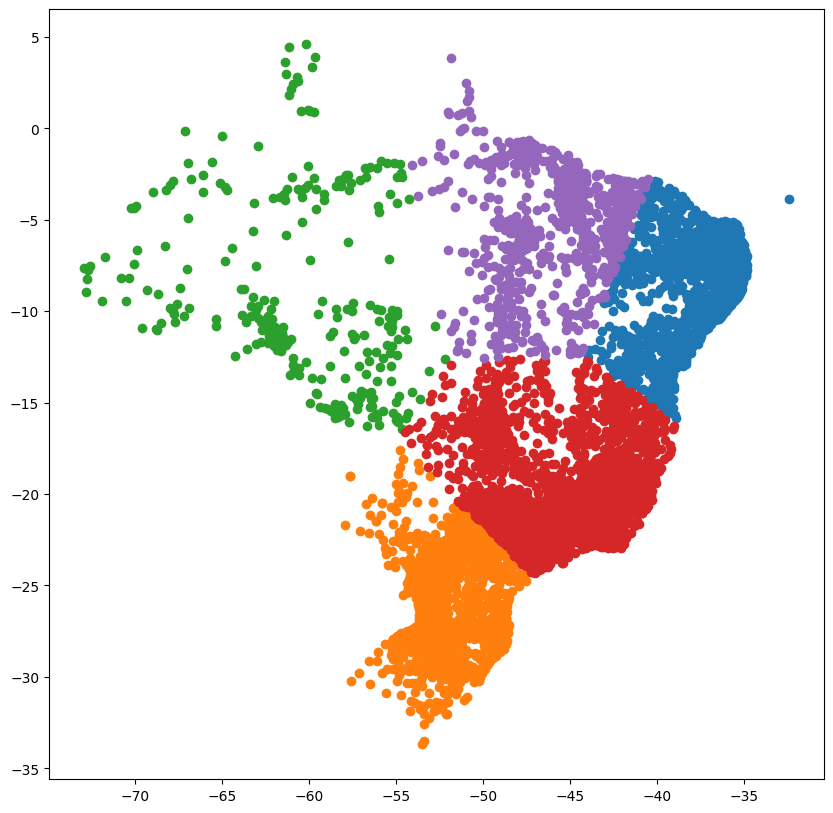

Coeficiente de Silhueta: 0.46162729569921884


In [ ]:
from sklearn.metrics import silhouette_score

nc = 5

X = df[["longitude", "latitude"]].to_numpy()

kmeans = KMeans(n_clusters=nc, random_state=0).fit(X)

df["labels"] = kmeans.labels_

plt.figure(figsize=(10, 10))

for i in range(nc):

    c = df[df["labels"] == i]

    plt.scatter(c["longitude"], c["latitude"])
# plt.scatter(centroid[:,0],centroid[:,1],c='white',s=100,edgecolors='black')

plt.show()

silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Coeficiente de Silhueta:", silhouette_avg)

**Interpretação:**

-   **Valores altos (próximos de 1):** Indicativo de que os pontos estão bem agrupados e bem separados dos outros clusters.
-   **Valores baixos (próximos de 0):** Indicativo de que os pontos estão próximos à fronteira dos clusters.
-   **Valores negativos (próximos de -1):** Indicativo de que os pontos podem estar mal agrupados, possivelmente no cluster errado.


# Exemplo 2


In [ ]:
import numpy as np

from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [ ]:
from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.362s	69662	0.680	0.719	0.699	0.570	0.695	0.186
random   	0.131s	69707	0.675	0.716	0.694	0.560	0.691	0.174
PCA-based	0.029s	72686	0.636	0.658	0.647	0.521	0.643	0.145
__________________________________________________________________________________


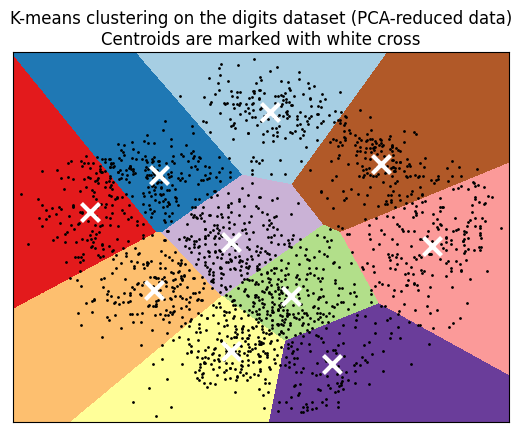

In [ ]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()